<a href="https://colab.research.google.com/github/alaa-alt/ML1_FinalProject/blob/main/ML1_Final_Project_Alaa_Abdelmonsef_Elkaffas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hand Gesture Classification Using MediaPipe Landmarks from the HaGRID Dataset


---



### 1. Importing necessary libraries

In [1]:
!pip install mediapipe

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mediapipe as mp
import seaborn as sns

### 2. Data loading

In [3]:
url = "https://media.githubusercontent.com/media/alaa-alt/ML1_FinalProject/refs/heads/main/hand_landmarks_data.csv"
df = pd.read_csv(url)
df.head()


,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call


In [4]:
df.columns

Index(['x1', 'y1', 'z1', 'x2', 'y2', 'z2', 'x3', 'y3', 'z3', 'x4', 'y4', 'z4',
       'x5', 'y5', 'z5', 'x6', 'y6', 'z6', 'x7', 'y7', 'z7', 'x8', 'y8', 'z8',
       'x9', 'y9', 'z9', 'x10', 'y10', 'z10', 'x11', 'y11', 'z11', 'x12',
       'y12', 'z12', 'x13', 'y13', 'z13', 'x14', 'y14', 'z14', 'x15', 'y15',
       'z15', 'x16', 'y16', 'z16', 'x17', 'y17', 'z17', 'x18', 'y18', 'z18',
       'x19', 'y19', 'z19', 'x20', 'y20', 'z20', 'x21', 'y21', 'z21', 'label'],
      dtype='object')

### 3. Data Visualization

In [5]:
df.isnull().values.any()

False

In [6]:
df.dtypes

,0
x1,float64
y1,float64
z1,float64
x2,float64
y2,float64
...,...
z20,float64
x21,float64
y21,float64
z21,float64


In [7]:
df.duplicated().sum()

0

### a. Showing landmarks connections from mediapipe

In [8]:
mp_hands = mp.solutions.hands
connections = list(mp_hands.HAND_CONNECTIONS)

### b. Choosing random samples to show

In [15]:
num_samples = 5
samples = df.sample(n=num_samples)

### c. Landmarks of hand and plotting them

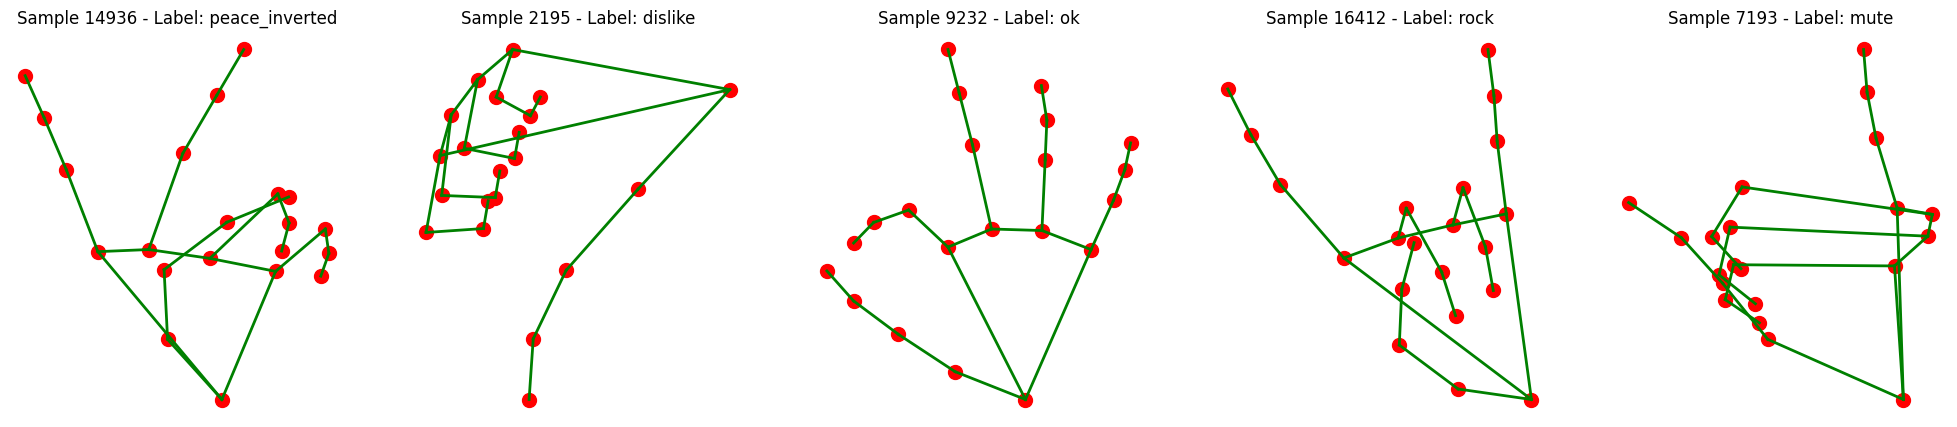

In [16]:
fig, axes = plt.subplots(1, num_samples, figsize=(5 * num_samples, 5))
if num_samples == 1:
    axes = [axes]

for i, (index, row) in enumerate(samples.iterrows()):
    landmarks_x = [row[f"x{j}"] for j in range(1, 22)]
    landmarks_y = [row[f"y{j}"] for j in range(1, 22)]

    # Plot MediaPipe connections
    for connection in connections:
        x_values = [landmarks_x[connection[0]], landmarks_x[connection[1]]]
        y_values = [landmarks_y[connection[0]], landmarks_y[connection[1]]]
        axes[i].plot(x_values, y_values, 'g-', linewidth=2)

    # Plot keypoints
    axes[i].scatter(landmarks_x, landmarks_y, c='red', s=100)
    axes[i].invert_yaxis()
    axes[i].set_title(f"Sample {index} - Label: {row['label']}")
    axes[i].axis("off")

plt.show()